In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression



In [2]:
def get_result_dict(pickle_files=["mlp.pickle", "inception.pickle", "wideresnet.pickle", "alexnet.pickle"],\
                   labels=["MLP 1x512", "Inception", "Wide ResNet", "AlexNet"]
                   ):
    result_dict = {}
    for file, label in zip(pickle_files, labels):
        final_dict = pickle.load(open(file,'rb'))
        overfit_epochs = []
        generalization_errors = []
        for level in range(0,120,20):
            X = np.array(final_dict[level]["train_accs"]).reshape(-1,1)
            reg=LinearRegression()
            reg.fit(X,np.arange(len(X)))
            ep = reg.predict([[0.95]]).astype(int).item()
            if label=="AlexNet" and level==100:
                ep = 238
            overfit_epochs.append(ep)
            acc = final_dict[level]["best_test_acc"]
            generalization_errors.append(1-acc)

        result_dict[label] = {}
        result_dict[label]["convergence_slowdown"] = overfit_epochs
        result_dict[label]["generalization_error_growth"] = generalization_errors
    return result_dict

def generate_plots(result_dict, labels=["MLP 1x512", "Inception", "Wide ResNet", "AlexNet"]):
    plt.figure(figsize=(16,6))

    plt.subplot(1,2,1)
    ax = plt.gca()
    for label in labels:
        overfit_epochs = result_dict[label]["convergence_slowdown"]
        ax.plot(range(0,120,20), overfit_epochs, '-o', label=label)
    ax.set_xlabel("Corruption Level")
    ax.set_ylabel("Time to overfit (epochs)")
    ax.legend()
    ax.grid()
    ax.set_title("Convergence slowdown")

    plt.subplot(1,2,2)
    ax = plt.gca()
    for label in labels:
        generalization_errors = result_dict[label]["generalization_error_growth"]
        ax.plot(range(0,120,20), generalization_errors, '-o', label=label)
    ax.set_xlabel("Corruption Level")
    ax.set_ylabel("Test Error")
    ax.legend()
    ax.grid()
    ax.set_title("Generalization Error Growth")


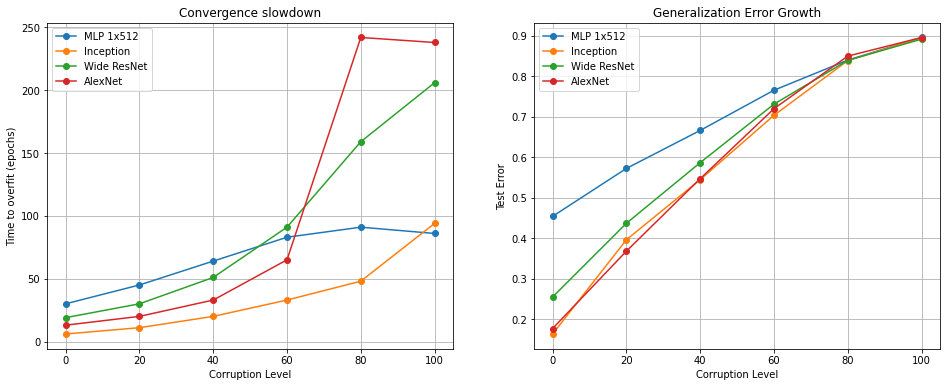

In [3]:
res = get_result_dict()

with open('results.pickle', 'wb') as handle:
    pickle.dump(res, handle, protocol=pickle.HIGHEST_PROTOCOL)

generate_plots(res)

In [4]:
!curl bashupload.com -T results.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Uploaded 1 file, 766 bytes

wget http://bashupload.com/ux3AL/results.pickle


100   898    0   132  100   766   1941  11264 --:--:-- --:--:-- --:--:-- 13205
